In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MNIST

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Download dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


5


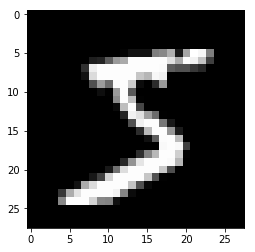

In [5]:
plt.imshow(X_train[0], cmap='gray');
print(y_train[0])

0


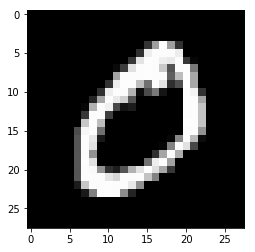

In [6]:
plt.imshow(X_train[1], cmap='gray');
print(y_train[1])

## Unroll and Normalize X

In [7]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# Normalize [0 - 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

## One hot encoding y

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
print(y_train[0:5])
print(y_train_cat[0:5])

[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [13]:
print(y_train.shape)
print(y_train_cat.shape)

(60000,)
(60000, 10)


## Train

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [15]:
K.clear_session()

model = Sequential()

model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

In [16]:
h = model.fit(
    X_train, y_train_cat,
    batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 221us/step - loss: 0.3562 - acc: 0.8913 - val_loss: 0.1939 - val_acc: 0.9392
Epoch 2/10
42000/42000 [==============================] - 18s 439us/step - loss: 0.1239 - acc: 0.9635 - val_loss: 0.1636 - val_acc: 0.9536
Epoch 3/10
42000/42000 [==============================] - 9s 203us/step - loss: 0.0843 - acc: 0.9745 - val_loss: 0.1054 - val_acc: 0.9699
Epoch 4/10
42000/42000 [==============================] - 8s 199us/step - loss: 0.0591 - acc: 0.9822 - val_loss: 0.1162 - val_acc: 0.9712
Epoch 5/10
42000/42000 [==============================] - 11s 268us/step - loss: 0.0472 - acc: 0.9855 - val_loss: 0.1045 - val_acc: 0.9739
Epoch 6/10
42000/42000 [==============================] - 20s 483us/step - loss: 0.0420 - acc: 0.9873 - val_loss: 0.1114 - val_acc: 0.9757
Epoch 7/10
42000/42000 [==============================] - 32s 751us/step - loss: 0.0337 - acc: 0.9893 - val_loss: 0.124

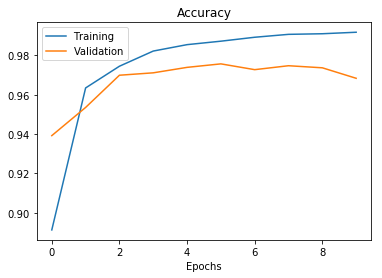

In [17]:
%matplotlib inline

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

## Testset Result

In [18]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 10s 1ms/step


0.97099999999999997